In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

ad_performance_raw = pd.read_csv('ad_performance.csv')
adgroup_performance_raw = pd.read_csv('adgroup_performance.csv')
camp_performance_raw = pd.read_csv('campaign_performance.csv')
ad_performance = ad_performance_raw.copy()
adgroup_performance = adgroup_performance_raw.copy()
camp_performance = camp_performance_raw.copy()

adw_face_raw = pd.read_csv('adwords_facebook_comp.csv')
adw_face = adw_face_raw.copy()

In [233]:
ad_performance['marketing'] = ad_performance['campaign'] + '/' + ad_performance['adgroup'] + '/' + ad_performance['ad']
adgroup_performance['marketing'] = adgroup_performance['campaign'] + '/' + adgroup_performance['adgroup'] 
camp_performance.rename(columns={'campaign': 'marketing'}, inplace=True)

In [234]:
ad_performance = ad_performance.drop(['ad','adgroup','campaign'],axis=1)
adgroup_performance = adgroup_performance.drop(['adgroup','campaign'],axis=1)

In [235]:
ad_performance = pd.melt(ad_performance, id_vars=["marketing", 'costs', 'count', 'performance'], var_name="funnel", 
                         value_name="value")
adgroup_performance = pd.melt(adgroup_performance, id_vars=["marketing", 'costs', 'count', 'performance'], var_name="funnel", 
                              value_name="value")
camp_performance = pd.melt(camp_performance, id_vars=["marketing", 'costs', 'count', 'performance'], var_name="funnel", 
                           value_name="value")

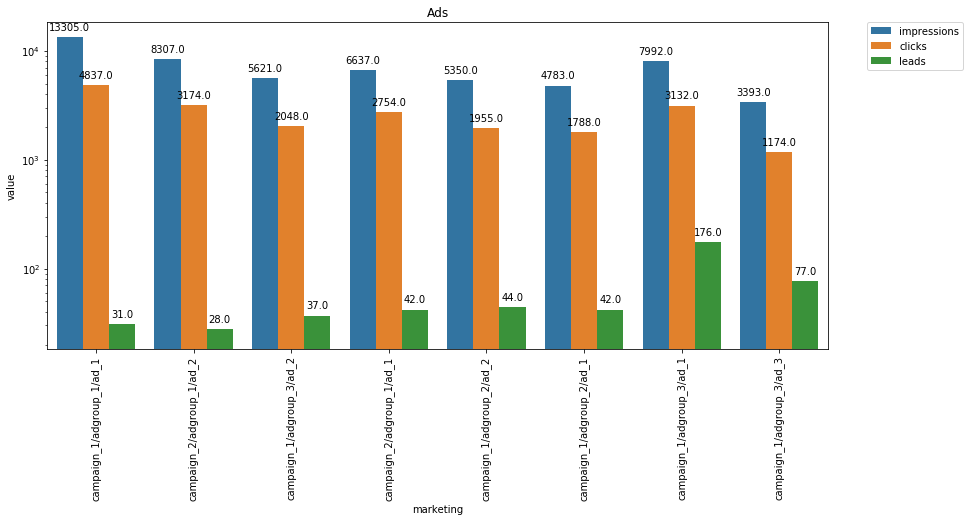

--


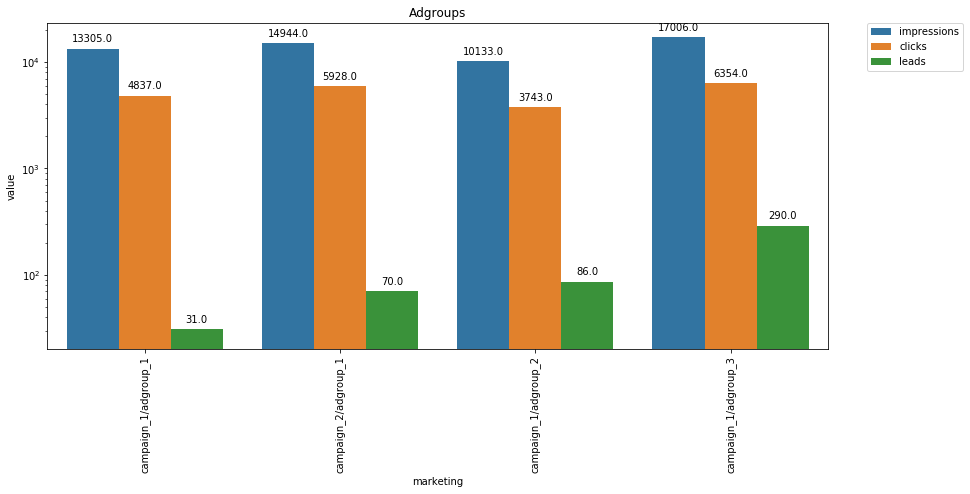

--


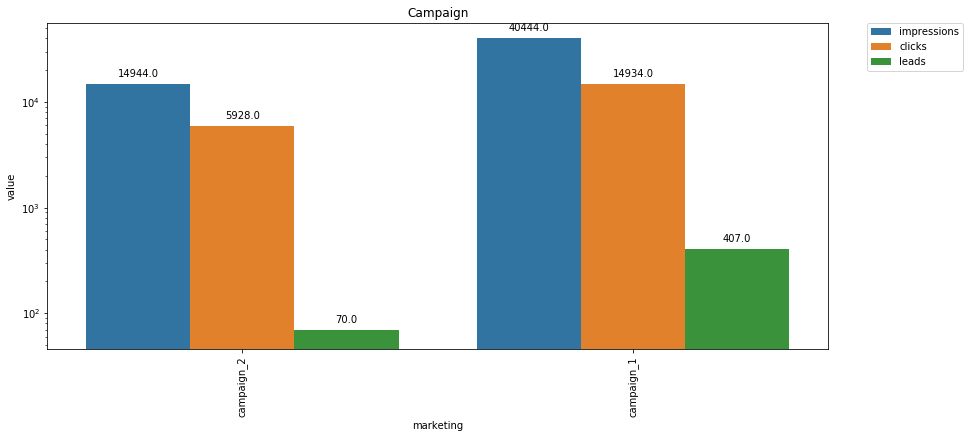

--


In [237]:
ad_performance.name = 'Ads'
adgroup_performance.name = 'Adgroups'
camp_performance.name = 'Campaign'

for dataset in [ad_performance, adgroup_performance, camp_performance]:
    fig, ax = plt.subplots(figsize=(14,6))
    grid = sns.barplot(x='marketing', y='value', hue='funnel', data=dataset, log=True)
    plt.xticks(rotation=90)
    grid.set_title(dataset.name)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    rects = ax.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = y_value

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

    plt.show()
    print('--')

In [213]:
adw_face['marketing'] = adw_face['campaign'] + '/' + adw_face['adgroup'] + '/' + adw_face['ad']
adw_face.drop(['ad','adgroup','campaign'],axis=1, inplace=True)

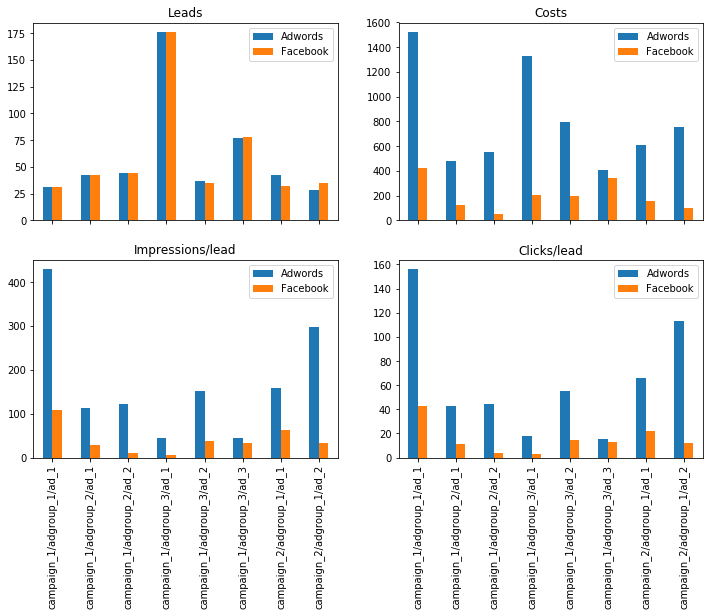

In [230]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')

x=adw_face['marketing']

leads_a=dict(zip(x,adw_face['ads_leads']))
leads_f=dict(zip(x,adw_face['fbk_leads']))
costs_a=dict(zip(x,adw_face['ads_costs']))
costs_f=dict(zip(x,adw_face['fbk_costs']))
imp_per_lead_a=dict(zip(x,adw_face['ads_imp_per_lead']))
imp_per_lead_f=dict(zip(x,adw_face['fbk_imp_per_lead']))
click_per_lead_a=dict(zip(x,adw_face['ads_click_per_lead']))
click_per_lead_f=dict(zip(x,adw_face['fbk_click_per_lead']))

df_ax1 = pd.DataFrame({'Adwords': leads_a, 'Facebook': leads_f})
df_ax2 = pd.DataFrame({'Adwords': costs_a, 'Facebook': costs_f})
df_ax3 = pd.DataFrame({'Adwords': imp_per_lead_a, 'Facebook': imp_per_lead_f})
df_ax4 = pd.DataFrame({'Adwords': click_per_lead_a, 'Facebook': click_per_lead_f})

# Non-stacked bar plot

df_ax1.plot.bar(figsize=(12, 8), ax=ax1)
df_ax2.plot.bar(figsize=(12, 8), ax=ax2)
df_ax3.plot.bar(figsize=(12, 8), ax=ax3)
df_ax4.plot.bar(figsize=(12, 8), ax=ax4)
ax1.set_title('Leads')
ax2.set_title('Costs')
ax3.set_title('Impressions/lead')
ax4.set_title('Clicks/lead')

plt.show() 